In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
img = image.load_img("F:/datasets/Car1/train/Acura/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_VnP.jpg")

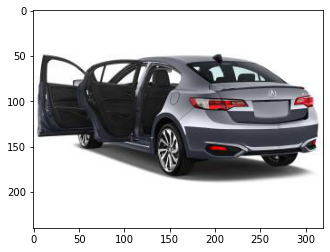

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("F:/datasets/Car1/train/Acura/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_VnP.jpg").shape

(240, 320, 3)

In [5]:
train = ImageDataGenerator(rescale= 1/255)

In [6]:
train_dataset = train.flow_from_directory('F:/datasets/Car1/train/',
                                          target_size = (180,180),
                                          batch_size = 16,
                                          class_mode = 'categorical')

Found 17931 images belonging to 8 classes.


In [7]:
train_dataset.class_indices

{'Acura': 0,
 'Alfa': 1,
 'Aston': 2,
 'Audi': 3,
 'BMW': 4,
 'Chevrolet': 5,
 'Ford': 6,
 'Honda': 7}

In [8]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [9]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
1121/1121 [==============================] - 866s 771ms/step - loss: 1.8752 - accuracy: 0.2390
Epoch 2/10
1121/1121 [==============================] - 800s 714ms/step - loss: 1.8012 - accuracy: 0.2543
Epoch 3/10
1121/1121 [==============================] - 798s 712ms/step - loss: 1.7525 - accuracy: 0.2896
Epoch 4/10
1121/1121 [==============================] - 793s 708ms/step - loss: 1.6913 - accuracy: 0.3193
Epoch 5/10
1121/1121 [==============================] - 767s 684ms/step - loss: 1.6479 - accuracy: 0.3454
Epoch 6/10
1121/1121 [==============================] - 855s 763ms/step - loss: 1.5970 - accuracy: 0.3712
Epoch 7/10
1121/1121 [==============================] - 890s 794ms/step - loss: 1.5484 - accuracy: 0.3974
Epoch 8/10
1121/1121 [==============================] - 922s 822ms/step - loss: 1.4952 - accuracy: 0.4215
Epoch 9/10
1121/1121 [==============================] - 771s 688ms/step - loss: 1.4506 - accuracy: 0.4415
Epoch 10/10
1121/1121 [=======================

In [14]:
test = ImageDataGenerator(rescale= 1/255)

In [15]:
test_dataset = test.flow_from_directory('F:/datasets/Car1/test/',
                                          target_size = (180,180),
                                          batch_size = 16,
                                          class_mode = 'categorical')

Found 3498 images belonging to 8 classes.


In [16]:
model.evaluate(test_dataset)

219/219 [==============================] - 76s 349ms/step - loss: 1.9575 - accuracy: 0.3502


[1.9575265645980835, 0.3502001166343689]